In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np


from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values

X = prosody_data.iloc[:, 6:].values

X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664754,1.053830,0.852551,-1.198336,0.200072,-0.733545,-1.235030,0.103794,1.158067,-0.448191,-0.798353,-0.336538
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678306,0.507352,1.239572,0.995481,-1.702560,0.455355,-0.275866,0.053696,0.166761,1.432087,-0.265655,-0.719621,-0.076686
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107752,0.624624,1.094844,0.804503,-1.841720,0.020709,0.410356,0.199719,-0.220348,1.292611,-0.222848,-0.221495,0.061713
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742876,-1.396203,1.127661,-2.928792,-0.275880,-2.670818,-0.624275,-0.108702,0.953204,1.146658,1.633754,-0.565946,0.949771,0.612017
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184058,0.794970,-2.643699,0.574301,-1.356924,-0.637014,-0.660182,1.174454,1.339969,1.470931,-0.388265,1.199063,-0.147211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926877,-1.283814,0.087162,0.307396,0.515531,1.552997,0.432343,-0.029450,-0.957253,0.665931,-0.729299,0.637437,-0.351740
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491811,-1.361853,0.804769,0.408120,0.674536,2.267880,0.250267,0.651280,-1.064509,0.207617,-0.407853,-0.112433,-0.123467
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171054,-1.566512,-2.676465,0.168666,0.383439,1.421384,1.610902,0.787211,-0.769480,0.922248,-0.664667,0.115090,-0.676192
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034925,1.060394,-0.914385,0.231075,0.813388,0.337734,1.709115,0.381001,0.315799,-0.862298,0.346448,-0.475633,-0.509504,-0.355778


In [4]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Hired3C
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664754,1.053830,...,-1.198336,0.200072,-0.733545,-1.235030,0.103794,1.158067,-0.448191,-0.798353,-0.336538,1
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678306,0.507352,1.239572,...,-1.702560,0.455355,-0.275866,0.053696,0.166761,1.432087,-0.265655,-0.719621,-0.076686,1
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107752,0.624624,1.094844,...,-1.841720,0.020709,0.410356,0.199719,-0.220348,1.292611,-0.222848,-0.221495,0.061713,1
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742876,-1.396203,1.127661,-2.928792,...,-2.670818,-0.624275,-0.108702,0.953204,1.146658,1.633754,-0.565946,0.949771,0.612017,1
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184058,0.794970,-2.643699,...,-1.356924,-0.637014,-0.660182,1.174454,1.339969,1.470931,-0.388265,1.199063,-0.147211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926877,-1.283814,0.087162,...,0.515531,1.552997,0.432343,-0.029450,-0.957253,0.665931,-0.729299,0.637437,-0.351740,0
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491811,-1.361853,0.804769,...,0.674536,2.267880,0.250267,0.651280,-1.064509,0.207617,-0.407853,-0.112433,-0.123467,0
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171054,-1.566512,-2.676465,...,0.383439,1.421384,1.610902,0.787211,-0.769480,0.922248,-0.664667,0.115090,-0.676192,0
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034925,1.060394,-0.914385,0.231075,...,0.337734,1.709115,0.381001,0.315799,-0.862298,0.346448,-0.475633,-0.509504,-0.355778,0


In [5]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf =RandomForestClassifier(n_estimators=600)
    clf.fit(X, y)
    clf.score(X, y)
    #AdaBoostClassifier(n_estimators=100, random_state=0)
    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']      
    #print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    #X_10_train =X_train[:,26] != 2
    X_10_test = X_test.loc[y_test!= 2]
    #X_10_test = X_test[:,26] != 2
    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf = RandomForestClassifier(n_estimators=600)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    #print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
   
    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
   # metrics.plot_roc_curve(clf, X_test, y_test) 
    
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 =  f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions,average='micro')
  
   
    return acc,f1,precision


              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        23
     class 1       0.81      0.96      0.88        23
     class 2       1.00      0.77      0.87        22

    accuracy                           0.91        68
   macro avg       0.92      0.91      0.91        68
weighted avg       0.92      0.91      0.91        68



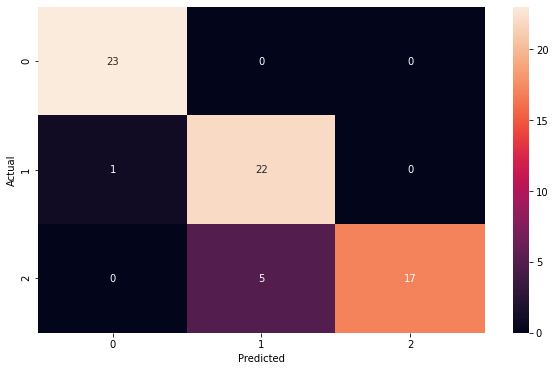

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96        23
     class 1       0.85      0.96      0.90        23
     class 2       1.00      0.86      0.93        22

    accuracy                           0.93        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.93      0.93      0.93        68



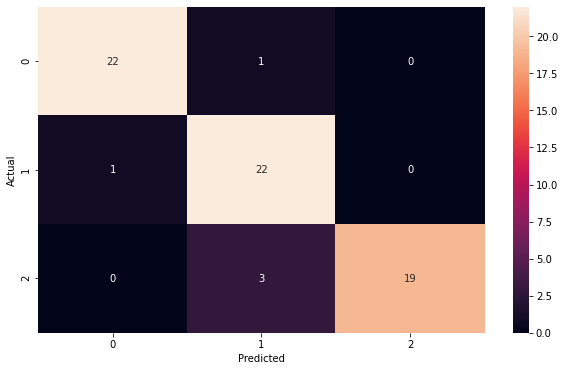

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.85      1.00      0.92        23
     class 2       1.00      0.82      0.90        22

    accuracy                           0.94        68
   macro avg       0.95      0.94      0.94        68
weighted avg       0.95      0.94      0.94        68



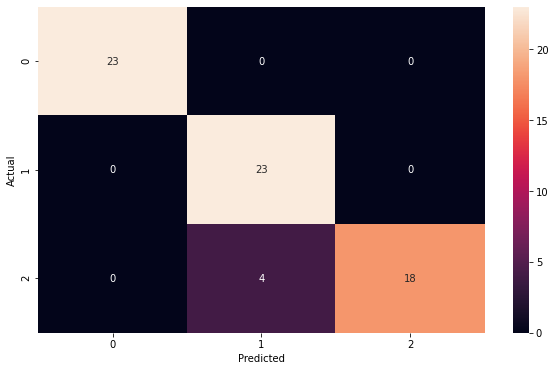

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96        23
     class 1       0.76      0.96      0.85        23
     class 2       1.00      0.73      0.84        22

    accuracy                           0.88        68
   macro avg       0.91      0.88      0.88        68
weighted avg       0.90      0.88      0.88        68



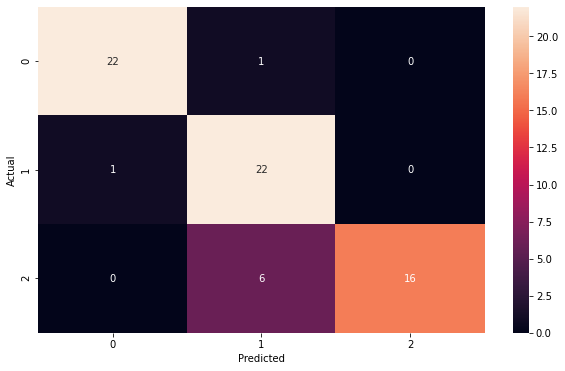

              precision    recall  f1-score   support

     class 0       0.92      0.96      0.94        23
     class 1       0.72      0.91      0.81        23
     class 2       1.00      0.68      0.81        22

    accuracy                           0.85        68
   macro avg       0.88      0.85      0.85        68
weighted avg       0.88      0.85      0.85        68



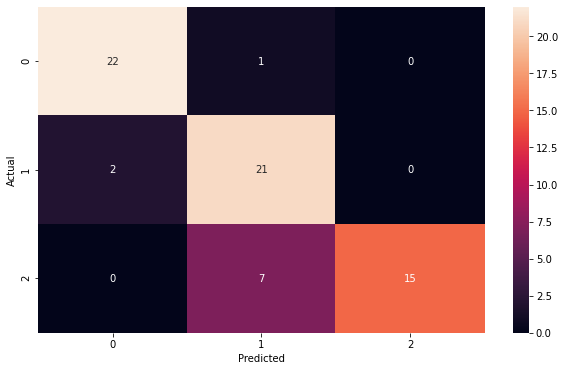

              precision    recall  f1-score   support

     class 0       0.91      0.91      0.91        23
     class 1       0.83      0.91      0.87        22
     class 2       1.00      0.91      0.95        23

    accuracy                           0.91        68
   macro avg       0.92      0.91      0.91        68
weighted avg       0.92      0.91      0.91        68



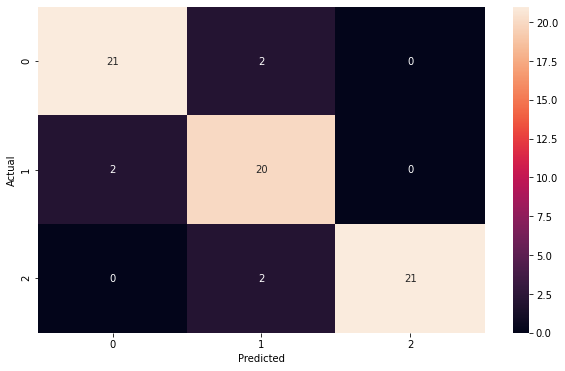

              precision    recall  f1-score   support

     class 0       0.92      1.00      0.96        23
     class 1       0.83      0.91      0.87        22
     class 2       1.00      0.83      0.90        23

    accuracy                           0.91        68
   macro avg       0.92      0.91      0.91        68
weighted avg       0.92      0.91      0.91        68



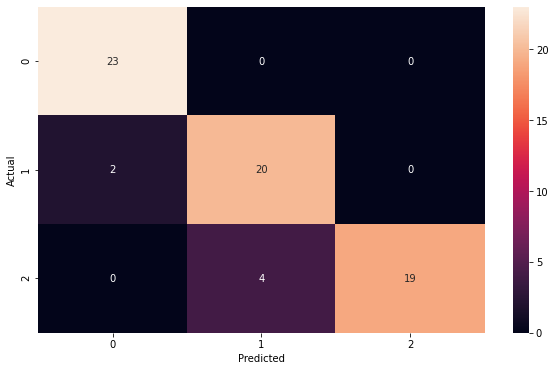

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96        23
     class 1       0.84      0.95      0.89        22
     class 2       1.00      0.87      0.93        23

    accuracy                           0.93        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.93      0.93      0.93        68



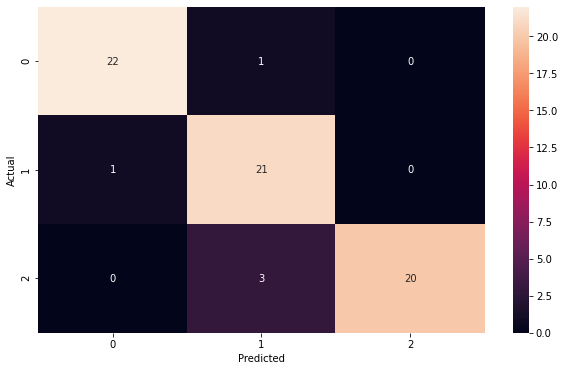

              precision    recall  f1-score   support

     class 0       0.92      1.00      0.96        23
     class 1       0.83      0.91      0.87        22
     class 2       1.00      0.83      0.90        23

    accuracy                           0.91        68
   macro avg       0.92      0.91      0.91        68
weighted avg       0.92      0.91      0.91        68



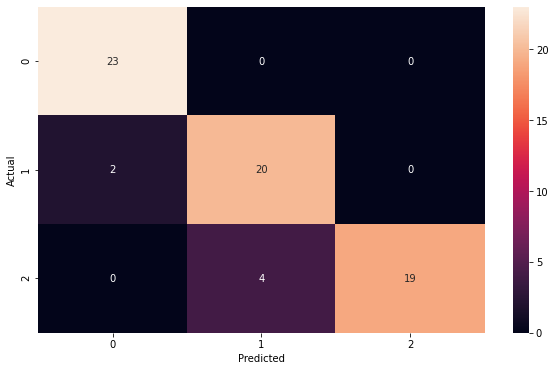

              precision    recall  f1-score   support

     class 0       0.91      0.91      0.91        23
     class 1       0.69      0.91      0.78        22
     class 2       1.00      0.70      0.82        23

    accuracy                           0.84        68
   macro avg       0.87      0.84      0.84        68
weighted avg       0.87      0.84      0.84        68



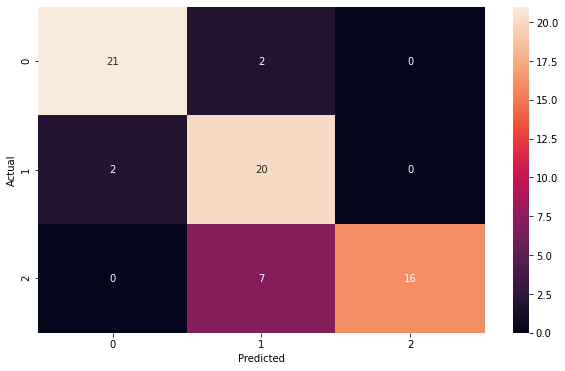

[91.17647058823529, 92.64705882352942, 94.11764705882352, 88.23529411764706, 85.29411764705883, 91.17647058823529, 91.17647058823529, 92.64705882352942, 91.17647058823529, 83.82352941176471]
CV Accuracy Score: 90.15% (+/- 3.16%)
CV  F1 Score: 90.16% (+/- 3.14%)
CV  Precision Score: 90.15% (+/- 3.16%)


In [6]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)
    
    
    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)
   
print(cv_acc_scores ) 
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))
